<a href="https://colab.research.google.com/github/iamab3/Fashion-Images-Classification-using-CNN---Deep-Learning/blob/main/Fashion_Image_Classification_using_CNN_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Setting seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
# Importing the dependencies
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Data Curation
fashion_mnist_data = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Data processing
type(train_images)

numpy.ndarray

In [5]:
type(test_labels)

numpy.ndarray

In [6]:
print(len(train_images))
print(len(test_images))
print(len(train_labels))
print(len(test_labels))

60000
10000
60000
10000


In [10]:
print(train_images[0].shape) #These are greyscale images. If they are RGB, the shape would be (28,28,3)

(28, 28)


In [9]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

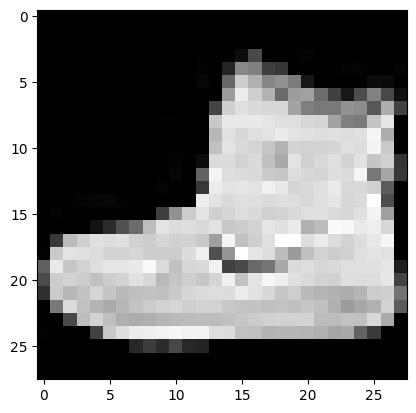

In [11]:
# Display an image from the dataset
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [12]:
print(train_labels[0])

9


Class Names = [T-shirt/top, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, ankle boot]

In [13]:
# Normalising pixel values from 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [14]:
# Reshaping images to specify that it's a single channel (grayscale)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [15]:
train_images.shape

(60000, 28, 28, 1)

Convolutional Neural Network

In [16]:
# Build a CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adding Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
# Model training
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7485 - loss: 0.6943 - val_accuracy: 0.8726 - val_loss: 0.3632
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8782 - loss: 0.3363 - val_accuracy: 0.8829 - val_loss: 0.3244
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8963 - loss: 0.2841 - val_accuracy: 0.8912 - val_loss: 0.2987
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9070 - loss: 0.2503 - val_accuracy: 0.8964 - val_loss: 0.2799
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9183 - loss: 0.2220 - val_accuracy: 0.8954 - val_loss: 0.2879
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9278 - loss: 0.1978 - val_accuracy: 0.8944 - val_loss: 0.2954
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9355 - loss: 0.1763 - val_accuracy: 0.8933 - val_loss: 0.3059
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9418 - loss: 0.160

In [19]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy: ', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8965 - loss: 0.3343

Test Accuracy:  0.8964999914169312


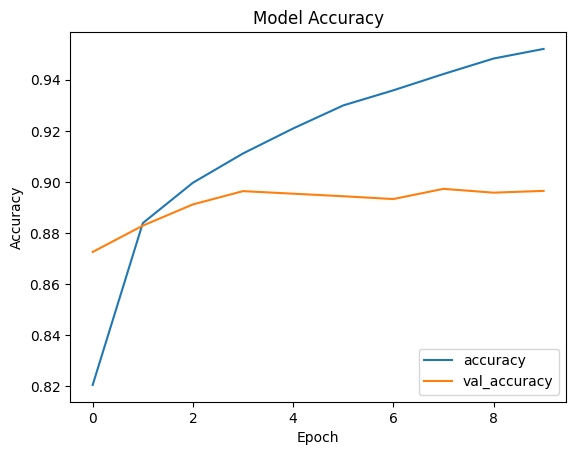

In [20]:
# Plotting training and validation accuracies
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

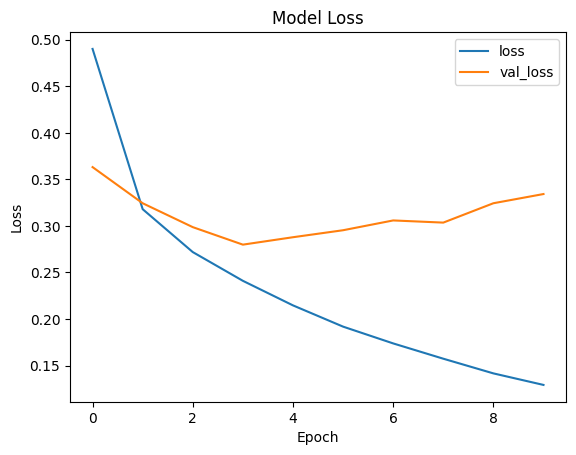

In [21]:
# Plotting training and validation loss values
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [22]:
# Saving the model
model.save('fashion_mnist_CNN - Deep Learning.h5')